<a href="https://colab.research.google.com/github/rvssridatta/ML/blob/main/19_KClusterringUsingIncomeSpent/19_KClusterringUsingIncomeSpent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
#load dataset
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [3]:
#importing dataset

dataset = pd.read_csv('dataset.csv')

In [4]:
#summarize dataset

print(dataset.shape)
print(dataset.describe())
print(dataset.head(5))

(303, 2)
           INCOME       SPEND
count  303.000000  303.000000
mean   245.273927  149.646865
std     48.499412   22.905161
min    126.000000   71.000000
25%    211.000000  133.500000
50%    240.000000  153.000000
75%    274.000000  166.000000
max    417.000000  202.000000
   INCOME  SPEND
0     233    150
1     250    187
2     204    172
3     236    178
4     354    163


In [5]:
#segregate & zipping dataset

Income = dataset['INCOME'].values
Spend = dataset['SPEND'].values
X = np.array(list(zip(Income,Spend)))
X[0:3]
Income[0:3]

array([233, 250, 204])

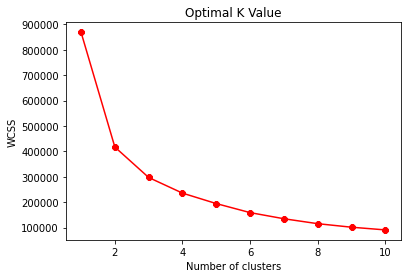

In [6]:
#finding optimized K value 
#using elbow and within cluster sumofsquares
#best k = low no of cluster and low interia

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters = i,random_state = 0)
  km.fit(X)
  wcss.append(km.inertia_)
plt.plot(range(1,11),wcss,color = 'red',marker = '8')
plt.title('Optimal K Value')
plt.xlabel('Number of clusters')
plt.ylabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#fitting the k-means to the dataset with k = 4

model = KMeans(n_clusters = 4, random_state = 0)
y_means = model.fit_predict(X)

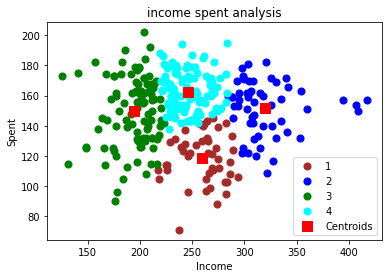

In [ ]:
#visualize the clusters for k = 4

plt.scatter(X[y_means == 0,0],X[y_means ==0,1], s=50,c='brown',label = '1')
plt.scatter(X[y_means == 1,0],X[y_means ==1,1], s=50,c='blue',label = '2')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1], s=50,c='green',label = '3')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1], s=50,c='cyan',label = '4')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s =100,marker = 's',c = 'red',label='Centroids')

plt.title('income spent analysis')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend()